In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
mf=pd.read_csv('model_u1.csv')

mf['srcuid_']=["#".join(x.split('#')[:-1])+'#' for x in mf.src]
mf['tgtuid_']=["#".join(x.split('#')[:-1])+'#' for x in mf.tgt]

mf['src_']=[x.split('#')[-1] for x in mf.src]
mf['tgt_']=[x.split('#')[-1] for x in mf.tgt]
mf=mf[['src_','tgt_','srcuid_','tgtuid_','delay','gamma','mass']]

In [3]:
mf=mf[mf.srcuid_==mf.tgtuid_]

In [4]:
VARNAMES=mf.src_.value_counts().index.values

VARNAMES

array(['popFrac', 'visitors', 'singles', 'MeetFrac', 'meetingPairs',
       'Dist', 'SiteTypeRecreationalSite', 'fracFriends',
       'SiteTypeRestaurant', 'myFriends', 'myFriendsR'], dtype=object)

Text(0.5, 1.0, 'tgt')

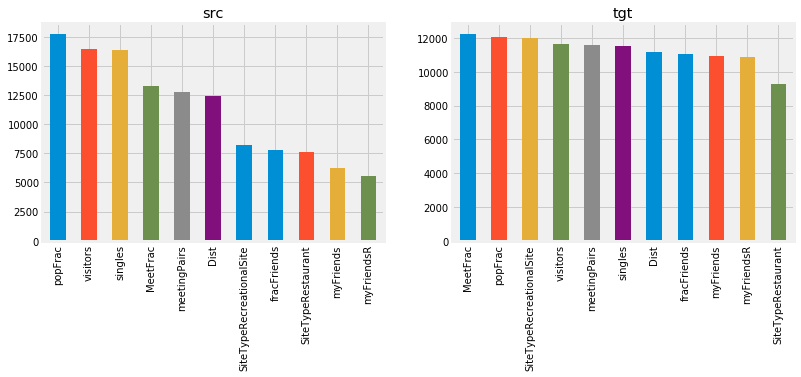

In [5]:
#print(mf.src_.value_counts())
fig=plt.figure(figsize=[12,4])
plt.subplot(121)
mf.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src')
plt.subplot(122)
mf.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt')

## Comment
---

> `popFrac, Dist, visitors, singles` are driving 
> a large proportion of the dynamics

# UID Stratification 

In [6]:
def readVarName(csvfile):
    return pd.read_csv(csvfile).varname.values

In [7]:
UVAR_lt=readVarName('left_town.csv')
UVAR_ls=readVarName('low_soc.csv')
UVAR_ms=readVarName('med_soc.csv')
UVAR_hs=readVarName('hig_soc.csv')
mf_ls=mf[mf.srcuid_.isin(UVAR_ls)]
mf_ms=mf[mf.srcuid_.isin(UVAR_ms)]
mf_hs=mf[mf.srcuid_.isin(UVAR_hs)]
mf_lt=mf[mf.srcuid_.isin(UVAR_lt)]



Text(0.5, 1.0, 'src: left')

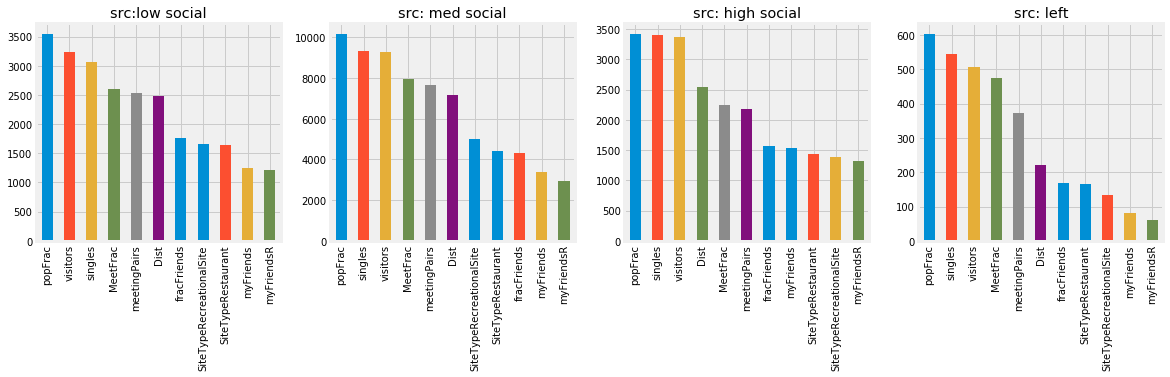

In [8]:
fig=plt.figure(figsize=[18,4])
plt.subplot(141)
mf_ls.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src:low social')
plt.subplot(142)
mf_ms.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src: med social')
plt.subplot(143)
mf_hs.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src: high social')
plt.subplot(144)
mf_lt.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src: left')


Text(0.5, 1.0, 'tgt: left')

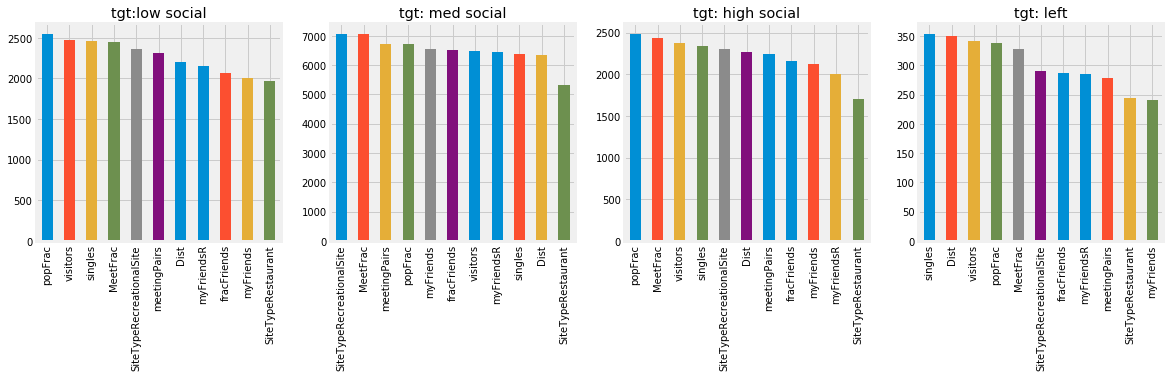

In [9]:
fig=plt.figure(figsize=[18,4])
plt.subplot(141)
mf_ls.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt:low social')
plt.subplot(142)
mf_ms.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt: med social')
plt.subplot(143)
mf_hs.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt: high social')
plt.subplot(144)
mf_lt.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt: left')


In [64]:


def getRelationships(MF,VAR,HIGAMMA=.7,D1=26,D2=52,D3=100,SELF=False):
    gf=MF[(MF.tgt_==VAR) & (mf.gamma>HIGAMMA) ]
    D1=26
    D2=52
    D3=100
    if not SELF:
        XX=VAR
    else:
        XX='xx'

    sf=gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].src_.value_counts()
    display(sf.sort_values('gamma',ascending=False).style.applymap(color_negative_red)
            .apply(highlight_max).set_precision(2))

    h1=sf.sort_values('gamma',ascending=False)\
    .style.applymap(color_negative_red)\
    .apply(highlight_max)\
    .bar(subset=['gamma','mass'], align='mid', color=['#d65f5f', '#5fba7d'])\
    .set_properties(**{'font-size': '10pt', 'font-family': 'Calibri'}).set_precision(3)\
    .render()
    
    sf=gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].src_.value_counts()
    display(sf.sort_values('gamma',ascending=False).style.applymap(color_negative_red).apply(highlight_max).set_precision(2))

    h2=sf.sort_values('gamma',ascending=False)\
    .style.applymap(color_negative_red)\
    .apply(highlight_max)\
    .bar(subset=['gamma','mass'], align='mid', color=['#d65f5f', '#5fba7d'])\
    .set_properties(**{'font-size': '10pt', 'font-family': 'Calibri'}).set_precision(2)\
    .render()

    sf=gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].src_.value_counts()
    display(sf.sort_values('gamma',ascending=False).style.applymap(color_negative_red).apply(highlight_max).set_precision(2))

    h3=sf.sort_values('gamma',ascending=False).style\
    .applymap(color_negative_red)\
    .apply(highlight_max)\
    .bar(subset=['gamma','mass'], align='mid', color=['#d65f5f', '#5fba7d'])\
    .set_properties(**{'font-size': '10pt', 'font-family': 'Calibri'}).set_precision(2)\
    .render()
        
    return h1+'\n\n'+h2+'\n\n'+h3

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def getDep(VAR='SiteTypeRecreationalSite',GAMMA=.2):
    printmd('# *'+VAR+'*')
    
    printmd('## **Low Social**')
    hl=getRelationships(MF=mf_ls,VAR=VAR,HIGAMMA=GAMMA,SELF=True)
    
    printmd('## **Medium Social**')
    hm=getRelationships(MF=mf_ms,VAR=VAR,HIGAMMA=GAMMA,SELF=True)
    
    printmd('## **High Social**')
    hs=getRelationships(MF=mf_hs,VAR=VAR,HIGAMMA=GAMMA,SELF=True)
    
    printmd('## **Leaving**')
    hg=getRelationships(MF=mf_lt,VAR=VAR,HIGAMMA=GAMMA,SELF=True)
    
    with open(VAR+".html", 'a') as _file:
   #        _file.write(hl)#hm+'\n HIGH SOCIAL \n'+hs+'\n LEAVING TOWN\n'+hg)
           _file.write(' <hr> LOW SOCIAL <br> '+hl+' <hr> MEDIUM SOCIAL  <br> '+hm+' <hr>  HIGH SOCIAL  <br> '+hs+' <hr>  LEAVING TOWN <br> '+hg)
    return

In [66]:
getDep(VAR='SiteTypeRecreationalSite',GAMMA=.2)

# *SiteTypeRecreationalSite*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.36,0.1,3
MeetFrac,1.5,0.29,0.097,18
meetingPairs,1,0.29,0.18,15
singles,1,0.28,0.17,7
popFrac,1,0.28,0.11,26
myFriends,1,0.27,0.13,3
visitors,1.5,0.25,0.12,10
SiteTypeRecreationalSite,1.5,0.22,0.057,6
myFriendsR,1,0.21,0.13,2


,delay,gamma,mass,Count
src_,,,,
popFrac,46,0.34,0.13,4
myFriends,47,0.32,-0.032,3
MeetFrac,48,0.3,0.22,6
meetingPairs,48,0.3,0.17,5
visitors,46,0.29,-0.074,1
SiteTypeRecreationalSite,46,0.26,-0.023,1
fracFriends,48,0.21,0.27,2


,delay,gamma,mass,Count
src_,,,,
myFriends,95,0.31,-0.032,3
fracFriends,96,0.27,0.13,1
MeetFrac,97,0.23,0.2,1
meetingPairs,96,0.22,0.2,1
SiteTypeRestaurant,59,0.22,0.041,1
visitors,59,0.21,0.039,1
singles,59,0.21,0.037,1
popFrac,77,0.2,-0.0053,2


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
SiteTypeRestaurant,17,0.44,0.029,2
meetingPairs,1,0.33,0.18,51
visitors,1,0.31,0.2,43
MeetFrac,1,0.31,0.13,64
popFrac,1,0.28,0.11,65
singles,1,0.28,0.2,44
myFriends,1,0.25,0.21,3
SiteTypeRecreationalSite,1,0.25,0.19,10
fracFriends,1.5,0.23,0.18,12


,delay,gamma,mass,Count
src_,,,,
MeetFrac,49,0.56,0.1,7
meetingPairs,48,0.5,0.29,6
popFrac,49,0.44,0.19,5
SiteTypeRestaurant,44,0.22,0.029,1
singles,44,0.22,0.029,1
visitors,44,0.22,0.029,1


,delay,gamma,mass,Count
src_,,,,
MeetFrac,97,0.47,0.067,7
meetingPairs,96,0.45,0.39,5
popFrac,60,0.37,0.091,7
SiteTypeRestaurant,59,0.29,0.024,2
singles,59,0.29,0.024,2
visitors,59,0.29,0.024,2


## **High Social**

,delay,gamma,mass,Count
src_,,,,
visitors,1,0.32,0.17,21
meetingPairs,1,0.31,0.22,18
popFrac,2,0.31,0.092,23
MeetFrac,2,0.31,0.12,24
singles,1,0.31,0.18,20
myFriends,1,0.28,0.14,3
fracFriends,1,0.24,0.055,2
SiteTypeRecreationalSite,1,0.24,0.18,5
myFriendsR,1,0.23,0.13,2


,delay,gamma,mass,Count
src_,,,,
meetingPairs,48,0.73,0.74,1
MeetFrac,48,0.48,0.4,2
popFrac,48,0.48,0.34,2
visitors,48,0.21,0.096,2


,delay,gamma,mass,Count
src_,,,,
meetingPairs,96,0.53,0.57,1
popFrac,96,0.36,0.11,3
MeetFrac,96,0.25,0.031,3


## **Leaving**

,delay,gamma,mass,Count
src_,,,,
meetingPairs,1,0.37,0.22,1
visitors,5,0.36,0.031,3
singles,7,0.33,0.045,4
MeetFrac,2,0.31,0.0083,3
popFrac,2.5,0.28,0.066,8
SiteTypeRecreationalSite,1,0.27,0.12,1


,delay,gamma,mass,Count
src_,,,,
meetingPairs,48,0.22,0.076,1
MeetFrac,48,0.2,0.02,1


,delay,gamma,mass,Count
src_,,,,
meetingPairs,61,0.23,-0.029,1


In [67]:
getDep(VAR='SiteTypeRestaurant',GAMMA=.2)

# *SiteTypeRestaurant*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
MeetFrac,1,0.26,0.096,1
SiteTypeRecreationalSite,1,0.25,0.68,1
visitors,15,0.25,-0.032,3
popFrac,1,0.23,0.074,1
singles,8.5,0.21,0.074,2


,delay,gamma,mass,Count
src_,,,,
visitors,47,0.35,-0.005,22
singles,48,0.33,0.08,19
popFrac,48,0.32,0.078,17
fracFriends,48,0.31,0.04,4
myFriendsR,48,0.28,0.096,2
myFriends,48,0.28,0.22,2
MeetFrac,47,0.26,0.055,1
SiteTypeRestaurant,46,0.25,0,1
Dist,46,0.23,-0.015,4


,delay,gamma,mass,Count
src_,,,,
Dist,96,0.3,-0.029,5
visitors,96,0.29,0.057,12
popFrac,96,0.27,0.077,9
singles,96,0.27,0.035,13
myFriends,96,0.24,0.0046,2
fracFriends,96,0.2,0.11,1


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
MeetFrac,1.5,0.42,0.0051,2
meetingPairs,13,0.34,0.00098,1
popFrac,12,0.3,-0.00032,3
myFriends,14,0.29,0.055,2
visitors,1,0.26,0.18,5
singles,1,0.24,0.05,4
myFriendsR,1,0.24,0.17,1
fracFriends,13,0.24,0.07,3


,delay,gamma,mass,Count
src_,,,,
singles,48,0.34,0.084,44
Dist,46,0.33,-0.035,11
myFriends,48,0.32,0.087,4
visitors,48,0.31,0.015,48
popFrac,48,0.31,0.064,44
MeetFrac,47,0.26,-0.0045,5
fracFriends,48,0.25,-0.006,4
meetingPairs,47,0.25,-0.078,4
SiteTypeRestaurant,46,0.24,0,5


,delay,gamma,mass,Count
src_,,,,
meetingPairs,98,0.32,0.029,3
visitors,96,0.27,0.11,35
singles,96,0.26,0.088,32
Dist,94,0.24,-0.05,11
popFrac,96,0.24,0.078,26
SiteTypeRestaurant,70,0.23,0,5
myFriends,95,0.21,-0.14,3


## **High Social**

,delay,gamma,mass,Count
src_,,,,
singles,1,0.62,0.25,1
visitors,1,0.43,0.2,2


,delay,gamma,mass,Count
src_,,,,
meetingPairs,37,0.69,0.071,5
MeetFrac,37,0.66,0.056,5
SiteTypeRecreationalSite,35,0.59,0.029,5
popFrac,46,0.37,0.017,16
singles,46,0.36,0.0055,17
visitors,46,0.36,0.019,15
fracFriends,48,0.31,0.16,1
myFriendsR,48,0.31,0.17,1
Dist,44,0.3,0,4


,delay,gamma,mass,Count
src_,,,,
SiteTypeRecreationalSite,76,0.59,0.029,1
visitors,96,0.33,0.099,13
singles,96,0.32,0.14,12
popFrac,95,0.29,0.017,9
myFriends,90,0.22,0.1,2
Dist,88,0.21,0,6
SiteTypeRestaurant,70,0.21,0,2


## **Leaving**

,delay,gamma,mass,Count


,delay,gamma,mass,Count
src_,,,,
myFriends,48,0.6,0.3,1
myFriendsR,48,0.59,0.28,1
fracFriends,48,0.58,0.27,1
MeetFrac,48,0.48,0.15,1
visitors,45,0.3,0.11,5
singles,47,0.3,0.085,5
meetingPairs,35,0.27,0.18,3
popFrac,47,0.24,0.087,3


,delay,gamma,mass,Count
src_,,,,
singles,95,0.27,0.097,3
visitors,93,0.26,0.1,5
meetingPairs,82,0.26,0.13,2
popFrac,90,0.25,0.036,2


In [68]:
getDep(VAR='myFriends',GAMMA=.2)

# *myFriends*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.34,0.074,17
meetingPairs,1,0.31,0.088,5
myFriends,1,0.31,0.11,3
popFrac,1,0.29,0.046,10
singles,3.5,0.26,0.065,4
myFriendsR,1,0.25,0.11,2
MeetFrac,1.5,0.22,0.034,6
visitors,4,0.21,0.037,5
SiteTypeRestaurant,12,0.21,0,14


,delay,gamma,mass,Count
src_,,,,
myFriendsR,48,0.34,0.025,4
myFriends,47,0.31,0.018,9
fracFriends,48,0.29,0.11,10
MeetFrac,48,0.29,0.26,2
popFrac,48,0.26,0.1,8
visitors,48,0.26,0.11,2
SiteTypeRestaurant,28,0.21,0,3
SiteTypeRecreationalSite,40,0.21,0,8
singles,48,0.21,0.064,4


,delay,gamma,mass,Count
src_,,,,
SiteTypeRecreationalSite,94,0.31,-0.013,4
fracFriends,96,0.29,0.31,4
meetingPairs,96,0.27,0.027,1
singles,95,0.24,0.06,5
visitors,80,0.24,0.035,4
popFrac,96,0.23,0.077,6
MeetFrac,96,0.23,0.074,3
myFriends,95,0.22,-0.13,3
myFriendsR,94,0.22,-0.15,2


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.3,0.14,37
MeetFrac,1,0.28,0.038,13
myFriendsR,1,0.28,0.11,9
myFriends,1,0.27,0.22,17
meetingPairs,1,0.25,0.12,16
singles,1,0.25,0.094,9
popFrac,1,0.24,0.052,15
SiteTypeRecreationalSite,1,0.23,0.0019,2
visitors,1,0.23,0.071,9


,delay,gamma,mass,Count
src_,,,,
meetingPairs,45,0.66,0.056,2
SiteTypeRecreationalSite,44,0.64,0.045,2
visitors,47,0.49,0.012,5
singles,47,0.43,0.012,6
myFriends,48,0.27,0.26,2
popFrac,48,0.27,0.11,7
MeetFrac,48,0.26,0.15,3
myFriendsR,48,0.24,0.24,3
fracFriends,48,0.23,0.25,4


,delay,gamma,mass,Count
src_,,,,
meetingPairs,92,0.43,0.041,2
fracFriends,96,0.32,0.14,2
popFrac,95,0.29,0.095,3
singles,94,0.27,-0.046,4
visitors,96,0.27,0.028,4
Dist,96,0.26,0.12,1
MeetFrac,98,0.23,0.15,2
SiteTypeRestaurant,96,0.21,0.19,1


## **High Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.29,0.14,8
popFrac,1,0.29,0.09,9
MeetFrac,1,0.28,0.058,6
visitors,1.5,0.26,0.11,4
meetingPairs,1,0.26,0.06,6
singles,2,0.24,0.1,3
myFriendsR,1,0.24,0.064,1
myFriends,1,0.22,0.19,5


,delay,gamma,mass,Count
src_,,,,
myFriends,47,0.26,0.052,1
popFrac,48,0.23,0.094,4
singles,48,0.23,0.17,2
meetingPairs,46,0.23,-0.024,1
visitors,48,0.22,0.26,2
fracFriends,48,0.21,0.26,1


,delay,gamma,mass,Count
src_,,,,
popFrac,95,0.29,0.096,3
singles,78,0.28,0.095,2
myFriends,96,0.23,0.38,1
visitors,95,0.22,0.1,3
SiteTypeRestaurant,95,0.2,0.23,1


## **Leaving**

,delay,gamma,mass,Count
src_,,,,
MeetFrac,1,0.23,0.025,1
fracFriends,2,0.22,0.19,1


,delay,gamma,mass,Count
src_,,,,
singles,47,0.41,0.11,3
meetingPairs,48,0.39,0.091,3
visitors,48,0.38,-0.032,2
popFrac,48,0.33,0.052,2
MeetFrac,46,0.28,-0.091,2


,delay,gamma,mass,Count
src_,,,,
visitors,96,0.32,0.096,1
MeetFrac,95,0.32,0.043,3
singles,96,0.29,-0.02,2
popFrac,94,0.27,0.057,4
meetingPairs,95,0.27,-0.084,3


In [69]:
getDep(VAR='popFrac',GAMMA=.2)

# *popFrac*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.39,-0.14,1
meetingPairs,1,0.37,0.062,2
popFrac,2,0.29,0.13,9
singles,1,0.27,0.2,3
visitors,1,0.26,0.18,4
MeetFrac,1.5,0.23,0.12,2


,delay,gamma,mass,Count
src_,,,,
MeetFrac,48,0.35,0.16,4
fracFriends,48,0.27,0.23,2
popFrac,47,0.25,0.12,12
singles,46,0.23,-0.06,4
visitors,46,0.23,-0.025,2
myFriends,45,0.22,-0.18,1


,delay,gamma,mass,Count
src_,,,,
MeetFrac,96,0.32,0.039,3
fracFriends,97,0.23,0.46,1
popFrac,95,0.22,0.065,3
singles,93,0.2,-0.035,2


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,2,0.47,0.2,3
popFrac,1,0.27,0.15,15
singles,1,0.26,0.27,16
visitors,1,0.25,0.28,16
SiteTypeRecreationalSite,1,0.24,0.14,1
meetingPairs,1,0.24,0.18,9
MeetFrac,1,0.24,0.18,8
myFriends,1,0.21,0.16,1


,delay,gamma,mass,Count
src_,,,,
MeetFrac,48,0.39,-0.021,2
meetingPairs,51,0.27,0.17,1
visitors,47,0.26,-0.033,11
singles,48,0.24,0.13,12
Dist,46,0.24,0.11,2
popFrac,47,0.24,0.077,14


,delay,gamma,mass,Count
src_,,,,
popFrac,96,0.27,0.08,4
visitors,96,0.24,0.16,1
singles,96,0.24,0.16,1


## **High Social**

,delay,gamma,mass,Count
src_,,,,
singles,1,0.4,0.22,6
popFrac,2,0.36,0.11,8
visitors,1,0.29,0.24,7
MeetFrac,1,0.28,0.13,3
meetingPairs,2,0.22,0.17,1


,delay,gamma,mass,Count
src_,,,,
Dist,48,0.31,0.56,1
singles,47,0.25,0.034,8
visitors,48,0.25,0.19,4
popFrac,48,0.23,0.13,6


,delay,gamma,mass,Count
src_,,,,
singles,95,0.29,-0.097,3
visitors,96,0.26,0.14,2
popFrac,96,0.24,0.18,2


## **Leaving**

,delay,gamma,mass,Count


,delay,gamma,mass,Count
src_,,,,
MeetFrac,46,0.24,-0.11,5
popFrac,48,0.23,-0.00072,2
visitors,46,0.23,-0.049,2
singles,46,0.22,-0.083,4


,delay,gamma,mass,Count


In [70]:
getDep(VAR='visitors',GAMMA=.2)

# *visitors*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
popFrac,1,0.28,0.16,11
visitors,2,0.27,0.2,5
singles,1,0.26,0.19,7
MeetFrac,1,0.23,0.22,1
meetingPairs,1,0.21,0.08,3


,delay,gamma,mass,Count
src_,,,,
SiteTypeRecreationalSite,47,0.44,0.013,3
myFriends,47,0.34,0.016,3
Dist,48,0.29,0.12,3
MeetFrac,48,0.27,0.2,1
visitors,48,0.27,0.2,8
popFrac,47,0.25,0.034,7
singles,48,0.24,0.19,6


,delay,gamma,mass,Count
src_,,,,
Dist,96,0.46,-0.039,1
visitors,94,0.24,-0.059,2
singles,96,0.23,0.14,1
MeetFrac,96,0.23,0.2,1


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
visitors,1,0.3,0.26,28
singles,1,0.29,0.22,21
popFrac,1,0.27,0.15,24
fracFriends,1,0.26,0.16,1
MeetFrac,1,0.25,0.24,17
meetingPairs,1,0.25,0.19,13
SiteTypeRecreationalSite,5,0.22,0.37,1


,delay,gamma,mass,Count
src_,,,,
visitors,47,0.31,0.073,19
singles,47,0.3,0.099,20
popFrac,48,0.26,0.098,12
Dist,48,0.22,0.51,1


,delay,gamma,mass,Count
src_,,,,
singles,96,0.25,0.16,3
visitors,96,0.24,0.077,4
Dist,96,0.24,0.22,1
popFrac,96,0.23,0.15,3


## **High Social**

,delay,gamma,mass,Count
src_,,,,
MeetFrac,1.5,0.29,0.21,6
SiteTypeRecreationalSite,1,0.28,0.082,1
singles,1,0.27,0.19,12
popFrac,2,0.27,0.13,15
visitors,1,0.26,0.26,9
myFriends,3,0.24,0.37,1
fracFriends,1,0.24,0.27,1
meetingPairs,1,0.21,0.26,4


,delay,gamma,mass,Count
src_,,,,
MeetFrac,40,0.65,0.034,2
popFrac,47,0.24,0.12,3
visitors,47,0.23,-0.025,7
singles,47,0.23,0.11,5


,delay,gamma,mass,Count
src_,,,,
meetingPairs,53,1,0,1
singles,96,0.25,0.16,1
visitors,96,0.25,0.19,3
popFrac,96,0.21,0.24,1


## **Leaving**

,delay,gamma,mass,Count
src_,,,,
meetingPairs,12,0.22,-0.1,1
visitors,12,0.21,-0.065,1
singles,12,0.2,-0.0059,1


,delay,gamma,mass,Count
src_,,,,
visitors,48,0.29,0.087,1
meetingPairs,48,0.26,0.00091,2
singles,46,0.25,-0.12,1
MeetFrac,48,0.24,0.1,2


,delay,gamma,mass,Count


In [71]:
getDep(VAR='Dist',GAMMA=.2)

# *Dist*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
meetingPairs,1,0.42,0.11,3
singles,1,0.39,0.17,2
visitors,1,0.34,0.14,5
fracFriends,1.5,0.34,0.06,2
popFrac,1,0.33,0.13,4
MeetFrac,2,0.24,0.069,3


,delay,gamma,mass,Count
src_,,,,
MeetFrac,48,0.4,0.22,1
SiteTypeRestaurant,48,0.34,0.56,1
fracFriends,47,0.31,0.31,3
popFrac,48,0.29,0.13,14
visitors,48,0.27,0.19,8
singles,47,0.27,-0.054,9
myFriends,48,0.26,0.29,1
myFriendsR,48,0.26,0.29,1
Dist,48,0.25,0.11,4


,delay,gamma,mass,Count
src_,,,,
Dist,92,0.29,-0.11,1
MeetFrac,96,0.27,0.17,3
SiteTypeRestaurant,96,0.25,0.47,1
popFrac,96,0.23,0.17,6
fracFriends,96,0.23,0.19,2
visitors,94,0.23,-0.062,5
singles,96,0.22,0.024,4


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
myFriendsR,1,0.62,0.018,2
fracFriends,1.5,0.44,0.19,4
visitors,1,0.43,0.22,18
SiteTypeRestaurant,1,0.41,0.35,1
singles,1,0.41,0.19,20
myFriends,1,0.28,0.24,3
meetingPairs,1,0.28,0.19,10
MeetFrac,2,0.28,0.074,5
SiteTypeRecreationalSite,1,0.27,0.29,3


,delay,gamma,mass,Count
src_,,,,
SiteTypeRestaurant,48,0.28,0.4,2
visitors,48,0.26,0.16,27
singles,48,0.25,0.12,31
popFrac,48,0.23,0.12,33
Dist,48,0.23,0.15,6
meetingPairs,47,0.21,-0.19,3


,delay,gamma,mass,Count
src_,,,,
popFrac,96,0.32,0.17,5
Dist,88,0.24,0,4
singles,96,0.23,0.12,6
visitors,96,0.21,0.15,8


## **High Social**

,delay,gamma,mass,Count
src_,,,,
SiteTypeRecreationalSite,1,0.4,0.29,3
singles,1,0.39,0.18,10
visitors,1,0.28,0.11,13
popFrac,1,0.26,0.1,5
fracFriends,1,0.25,0.16,1
myFriendsR,1,0.24,0.12,1
myFriends,1,0.23,0.093,2
meetingPairs,1,0.22,0.14,1
MeetFrac,3,0.22,0.023,1


,delay,gamma,mass,Count
src_,,,,
popFrac,48,0.24,0.069,6
singles,48,0.24,0.059,11
visitors,48,0.23,0.11,10
MeetFrac,46,0.22,-0.068,1


,delay,gamma,mass,Count
src_,,,,
popFrac,96,0.27,0.62,1
visitors,96,0.23,0.15,6
singles,96,0.22,0.19,5
SiteTypeRestaurant,61,0.2,0,1


## **Leaving**

,delay,gamma,mass,Count


,delay,gamma,mass,Count
src_,,,,
MeetFrac,48,0.33,0.059,1
visitors,48,0.33,0.11,1
popFrac,48,0.3,0.11,1
singles,48,0.3,0.18,1
meetingPairs,48,0.23,0.085,1


,delay,gamma,mass,Count
src_,,,,
MeetFrac,96,0.27,0.14,1
singles,96,0.24,0.04,1
meetingPairs,94,0.22,-0.1,1
